# **8주차 - 1** : 담금질 시늉, 세일즈맨 문제, 실행 시간 줄이기

# Simulated Annealing(담금질 시늉)

**세일즈맨 문제**

본인의 집$(0,0)$에서 출발하여 50개 지점에 택배 물품을 전달하고 다시 집$(0,0)$으로 돌아오는 길의 최적 방문 순서 찾기

**처음에 풀었던 방식**


---


1. 초기 조건 & 50개 지점의 좌표 만들기

  ⇒ 출발 지점과 도착 지점은 집$(0, 0)$이고, 그 사이에 random한 50개 지점의 좌표를 넣음 !

2. 전체 거리 계산하는 함수 만들기 : **distance()**

  > $D = \displaystyle\sum_{i=0}^{N}|\overrightarrow{r_{i+1}}-\overrightarrow{r_i}|$

3. 초기 좌표에 대한 전체 거리와 방문 순서 그래프로 만들기

4. 임의의 두 개의 지점$(i, j)$의 순서를 바꿔주는 함수 만들기 : **swap()**

5. 지점 i와 지점 j의 순서를 바꾸었을 때, 거리가 작아지면 순서 바꾸기 성공 !

6. 그 외(작아지지 않을 때)의 경우, 확률에 따라 순서를 바꾸는 것을 허용할 지 OR 하지 않을지 결정 !

  > $ΔD = $ (방문 순서 바꾼 **후**의 거리) - (바꾸기 **전**의 거리)

  > $P = e^{-ΔD/T}$

7. 시간에 따라, 온도의 max에서 온도의 min이 될 때까지 계속 실행한다.

  > $T_{max} = 100$

  > $T_{min} = 1^{-10}$

  > $T = T_{max} * e^{-t/100000}$

8. 최적화된 거리와 최적 방문 순서에 대한 그래프를 그려보기

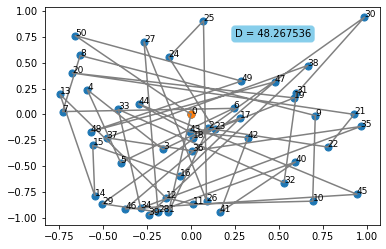

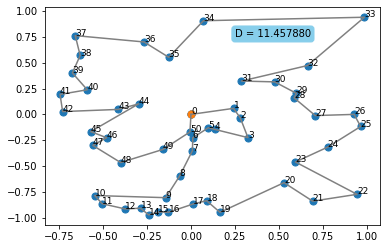

최적화에 걸리는 시간 : 1207.602804119 sec


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
####################################################################################################
# 초기 조건
N = 50; Tmin = 1e-10; Tmax = 100; t = 0
T = Tmax * np.exp(-t/100000)

# -1 ~ 1 의 N개의 초기 2차원 좌표 만들기
np.random.seed(2)
r = [[0,0] for i in range(N+2)]
for i in range(1,N+1):
  r[i] = np.random.rand(2)*2-1
r = np.array(r)
####################################################################################################
# 전체 거리 계산하는 함수 !!
def distance():
  D = 0
  for i in range(N+1):
    D += np.sqrt((r[i+1][0]-r[i][0])**2 + (r[i+1][1]-r[i][1])**2)
  return(D)

# i 위치와 j 위치 바꾸는 합수 !!
def swap(i,j):
  s = [r[i][0],r[i][1]]; r[i] = r[j]; r[j] = s

# 그래프 그리기
def draw_fig(D):
  plt.scatter(r[:,0],r[:,1],s=50)
  plt.scatter(0,0,s=50)
  plt.plot(r[:,0],r[:,1],c='gray')
  for i in range(0,N+1):
    plt.annotate(i,(r[i,0],r[i,1]),fontsize=9)
  plt.text(x=0.25,y=0.75,s='D = %f'%(D),bbox=dict(boxstyle='round',color='skyblue'))
  plt.show()
####################################################################################################
# 초기 이동 거리 & 그림 그리기
D_ini = distance()
draw_fig(D_ini)
####################################################################################################
# 실행 시간 알아보기 !
start_time = time.process_time()
# 실행 !!
while T > Tmin:
  D_past = distance()
  ## 바꾸기
  i = np.random.randint(1,N)
  j = np.random.randint(1,N-1)
  if i == j: j = N   ### index 주의
  swap(i,j); D = distance()
  ## 전이 허용 X
  if D > D_past :
    if np.random.rand() > np.exp(-(D - D_past)/T):
      swap(i,j); D = D_past
  t+=1; T = Tmax * np.exp(-t/100000)   ### 온도 변화에 민감하게

# 최단 거리 & 그림 그리기
draw_fig(D)
end_time = time.process_time()
print('최적화에 걸리는 시간 :',end_time - start_time,'sec')



---



---



**실행 시간을 줄이기 위한 방식**

---



1. 초기 조건 & 50개 지점의 좌표 만들기

  ⇒ 출발 지점과 도착 지점은 집$(0, 0)$이고, 그 사이에 random한 50개 지점의 좌표를 넣음 !

2. 전체 거리 계산하는 함수 만들기 : **distance()**

  > $D = \displaystyle\sum_{i=0}^{N}|\overrightarrow{r_{i+1}}-\overrightarrow{r_i}|$

3. 초기 좌표에 대한 전체 거리와 방문 순서 그래프로 만들기

4. 임의의 두 개의 지점$(i, j)$의 순서를 바꿔주는 함수 만들기 : **swap()**

5. '$ΔD = $ (방문 순서 바꾼 **후**의 거리) - (바꾸기 **전**의 거리)' 를 계산하는 함수 만들기 : **Delta_D(i,j)**
  > $|i - j| = 0$인 경우 : $i$와 $j$를 뽑을 때 index 조정을 했기 때문에, 나올 수 없음

  > $|i - j| = 1$인 경우 : $ΔD = [ d(j,i-1) + d(i,j+1) ] - [ d(i,i-1) + d(j,j+1) ]$

  > $|i - j| \geq 2$인 경우 : $ΔD = [ d(j,i-1) + d(j,i+1) + d(i,j-1) + d(i,j+1) ] - [ d(i,i-1) + d(i,i+1) + d(j,j-1) + d(j,j+1) ]$

6. ΔD가 음수인 경우 ⟶ 전체 거리의 감소 ⇒ 무조건 전이 !

   ΔD가 양수인 경우 중, 확률에 따라 ⇒ 전이 !

  > $P = e^{-ΔD/T}$

7. 시간에 따라, 온도의 max에서 온도의 min이 될 때까지 계속 실행한다.

  > $T_{max} = 100$

  > $T_{min} = 1^{-10}$

  > $T = T_{max} * e^{-t/100000}$

8. 최적화된 거리와 최적 방문 순서에 대한 그래프를 그려보기

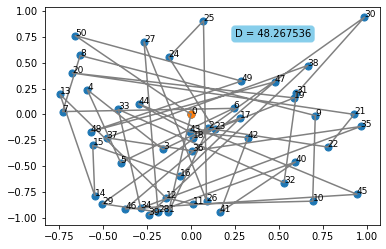

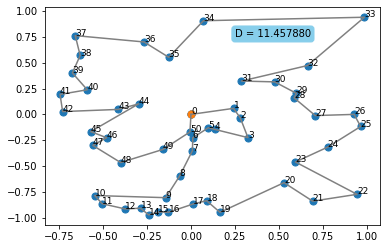

최적화에 걸리는 시간 : 132.39870598200014 sec


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
####################################################################################################
# 초기 조건
N = 50; Tmin = 1e-10; Tmax = 100; t = 0
T = Tmax * np.exp(-t/100000)

# -1 ~ 1 의 N개의 초기 2차원 좌표 만들기
np.random.seed(2)
r = [[0,0] for i in range(N+2)]
for i in range(1,N+1):
  r[i] = np.random.rand(2)*2-1
r = np.array(r)
####################################################################################################
# 전체 거리 계산하는 함수 !!
def distance():
  D = 0
  for i in range(N+1):
    D += np.sqrt((r[i+1][0]-r[i][0])**2 + (r[i+1][1]-r[i][1])**2)
  return(D)

# i 위치와 j 위치 바꾸는 합수 !!
def swap(i,j):
  s = [r[i][0],r[i][1]]; r[i] = r[j]; r[j] = s

# swap 전과 후의 거리 차이를 구하는 함수 !!
def Delta_D(a,b):
  def d(a,b):
    d = np.sqrt((r[a][0]-r[b][0])**2 + (r[a][1]-r[b][1])**2)
    return(d)
  ## swap할 i와 j가 1 차이날 때 Delta_D 계산
  if (a - b) == (-1):
    D_before = d(a,a-1) + d(b,b+1)
    D_after = d(b,a-1) + d(a,b+1)
  elif (a - b) == 1:
    D_before = d(b,b-1) + d(a,a+1)
    D_after = d(a,b-1) + d(b,a+1)
  ## swap할 i와 j가 2 이상 차이날 때 Delta_D 계산
  else:
    D_before = d(a,a-1) + d(a,a+1) + d(b,b-1) + d(b,b+1)
    D_after = d(b,a-1) + d(b,a+1) + d(a,b-1) + d(a,b+1)
  return(D_after - D_before)

# 그래프 그리기
def draw_fig(D):
  plt.scatter(r[:,0],r[:,1],s=50)
  plt.scatter(0,0,s=50)
  plt.plot(r[:,0],r[:,1],c='gray')
  for i in range(0,N+1):
    plt.annotate(i,(r[i,0],r[i,1]),fontsize=9)
  plt.text(x=0.25,y=0.75,s='D = %f'%(D),bbox=dict(boxstyle='round',color='skyblue'))
  plt.show()
####################################################################################################
# 초기 이동 거리 & 그림 그리기
D_ini = distance()
draw_fig(D_ini)
####################################################################################################
# 실행 시간 알아보기 !
start_time = time.process_time()
# 실행 !!
Dmin = D_ini
while T > Tmin:
  ## 바꾸기
  i = np.random.randint(1,N)
  j = np.random.randint(1,N-1)
  if i == j: j = N   ### index 주의
  ## 전이 허용
  dd = Delta_D(i,j)
  if (dd < 0) or ((dd >= 0) and (np.random.rand() < np.exp((-1)*dd/T))) :
    swap(i,j); Dmin += dd
  t+=1; T = Tmax * np.exp(-t/100000)   ### 온도 변화에 민감하게

# 최단 거리 & 그림 그리기
draw_fig(Dmin)
end_time = time.process_time()
print('최적화에 걸리는 시간 :',end_time - start_time,'sec')



---



---



**실행 시간 비교 !**

처음에 했던 방식 : 1207초 $\approx$ 20분

실행 시간을 줄이기 위한 방식 : 132초 $\approx$ 2분

⇒ **실행 시간이 약 $\frac{1}{10}$ 정도 줄었다 !**